In [1]:
import numpy       as np
import pandas      as pd
import seaborn as sns
import scipy.stats as st
from scipy.stats import ttest_1samp,ttest_ind, wilcoxon,chi2_contingency,chisquare,levene,mannwhitneyu,kruskal,shapiro,bartlett
from statsmodels.stats.power import ttest_power

import matplotlib.pyplot     as     plt
from statsmodels.stats.proportion import proportions_ztest

In [3]:
import pydataset

### QUE:- The food administration authority received complaints that maggi noddles pack contains lead beyond permissible limit. the ammount of lead should not exceed 190gm.conduct the hypothesis test.

In [78]:
##### right tail test


mu=190
n=64
degree_of_freedom=n-1
sigma=10           #std of sample is given so degree of freedom =n-1
x_mean=185


H0='mu<=190'       #step-1           #clam is exceeding so idealy not exceed 
H1='mu>190'

alpha=0.05               #step-2

t_cal=(x_mean-mu)/(sigma/np.sqrt(n))              #step-3

t_cal=abs(t_cal)             #modulus use abs()

t_critical=st.t.ppf(alpha,degree_of_freedom)         #step-4

t_critical=abs(t_critical)

print('t_cal=',t_cal)
print('t_critical=',t_critical)


#step-05
### Critical value approach
if (t_cal<t_critical):
    print('accept Ho',H0)
else:
    print('reject H0',H1)



t_cal= 4.0
t_critical= 1.6694022215079614
reject H0 mu>190


In [9]:
# P-Value Approach
            ## t_calculated,degree of freedom
p_value=st.t.sf(-4,degree_of_freedom)

print('p_value= ',p_value)
print('alpha= ',alpha)

if (alpha<p_value):
    print('accept Ho',H0)
else:
    print('reject H0',H1)

p_value=  0.9998438991449128
alpha=  0.05
accept Ho mu=280


### two tail test:--

In [6]:
mu=280
n=36
degree_of_freedom=n-1
sigma=12     

## while calculating sigma for smaple we use    sigma=np.std(daily_intake,ddof=1)   where ddof:--delta degree of freedom

#std of sample is given so degree of freedom =n-1
x_mean=278.5

H0='mu=280'       #step-1           
H1='mu!=280'

alpha=0.05   #alpha devided into two 0.25 and 0.25 as two tail            #step-2

t_cal=(x_mean-mu)/(sigma/np.sqrt(n))              #step-3

t_cal=abs(t_cal)             #modulus use abs()

t_critical=st.t.ppf(0.025,n)         #step-4

t_critical=abs(t_critical)

print('t_cal=',t_cal)
print('t_critical=',t_critical)


#step-05
# Critical Value Approach

if (t_cal<t_critical):
    print('accept H0. Thus, the inference is that ',H0)
else:
    print('reject H0',H1)

t_cal= 0.75
t_critical= 2.0280940009804507
accept H0. Thus, the inference is that  mu=280


In [7]:
## P-Value Approach
p_value=st.t.cdf(-0.75,n)+st.t.sf(0.75,n) #which is less then alpha in p -value approach  so accept Ho
if (alpha<p_value):
    print('accept H0. Thus, the inference is that ',H0)
else:
    print('reject H0',H1)

accept H0. Thus, the inference is that  mu=280


## two tail test with dataset

In [4]:
d=pd.read_csv('cs1.csv')

In [5]:
d.head()

,id,age,gender,region,income,married,children,car,save_act,current_act,mortgage,pl
0,ID12101,48,FEMALE,INNER_CITY,17546.0,NO,1,NO,NO,NO,NO,YES
1,ID12102,40,MALE,TOWN,30085.1,YES,3,YES,NO,YES,YES,NO
2,ID12103,51,FEMALE,INNER_CITY,16575.4,YES,0,YES,YES,YES,NO,NO
3,ID12104,23,FEMALE,TOWN,20375.4,YES,3,NO,NO,YES,NO,NO
4,ID12105,57,FEMALE,RURAL,50576.3,YES,0,NO,YES,NO,NO,NO


### wheather the income of female and male is same or not?

In [6]:
### wheather the income of female and male is same or not?

mi=d[d['gender']=='MALE']['income']
type(mi),mi.head()

(pandas.core.series.Series, 1     30085.10
 6      8877.07
 7     24946.60
 9     24212.10
 14    19474.60
 Name: income, dtype: float64)

In [7]:
fi=d[d['gender']=='FEMALE']['income']
type(mi),mi.head()

(pandas.core.series.Series, 1     30085.10
 6      8877.07
 7     24946.60
 9     24212.10
 14    19474.60
 Name: income, dtype: float64)

In [9]:
mi.mean(),fi.mean()

(27082.06017647058, 27435.078875000014)

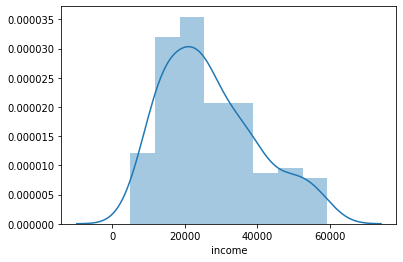

In [10]:
## 1) normality test:

sns.distplot(mi)
plt.show()                 #no normal

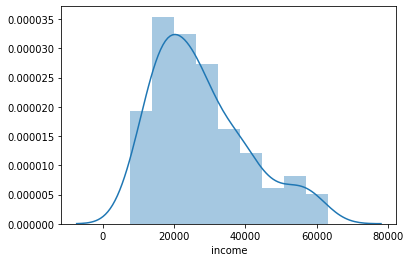

In [11]:
sns.distplot(fi)
plt.show()

In [12]:
### from shapiro we get two hypothesis

### H0: variable follow normal dist
### H1: variable doesn't follow normal dist

In [13]:
shapiro(mi)               #use shapiro test for normality ,var is normal or not
###(calculated or statistic value ,  probability or p value)

### here p value which is very lesser and is less than alpha that means reject H0 and inference is variable doesn't follow normal dist

(0.946923553943634, 5.41195868208888e-06)

In [14]:
shapiro(fi)               #use shapiro test for normality ,var is normal or not
###(calculated or statistic value ,  probability or p value)

### here p value which is very lesser and is less than alpha that means reject H0 and inference is variable doesn't follow normal dist

(0.9338082075119019, 9.223952019965509e-07)

### in parametric test ,we check sample is normal distributed or not for this first we shapiro test if it will fail in shapiro then we will not go further or if it find as normally distributed then vatriance and further test we will do on sample .

### both samples are not following normal,hence we can't apply t test

## ( A ) Variance Test:-
###  1) sample vs population var test  ( Chi Square test)
                           
### 2) two sample test:--- a) Levene,      b) Bartlett      ,c) F-Test

###  1) sample vs population var test  ( Chi Square test):--

 EXE:-- Blood group of patients of the hospital is given below:


At 5% level of significance do you have evidence to conclude that there are differences in the distribution of blood groups among patients that is expected as per our prior knowledge.

In [1]:
observed=pd.DataFrame({'Blood group':['O','A','B','AB'],'Count':[67,83,29,8]})
expected=pd.DataFrame({'Blood group':['O','A','B','AB'],'Count':[82.28,84.15,14.96,5.6]})
expected

,Blood group,Count
0,O,82.28
1,A,84.15
2,B,14.96
3,AB,5.60


In [2]:
observed

,Blood group,Count
0,O,67
1,A,83
2,B,29
3,AB,8


In [10]:
observed.Count.mean(),expected.Count.mean()

(46.75, 46.7475)

In [17]:
## H0:  mu of O = mu of A = mu of B = mu of AB
## H1: mu of O != mu of A != mu of B != mu of AB


chisquare(f_obs=observed['Count'], f_exp= expected['Count'])
### here p value is lesser than alpha that means reject H0 and no differnece in blood group

Power_divergenceResult(statistic=17.058473119275256, pvalue=0.0006874393492369232)

### 2) two sample test:--- 
### a) Levene
### b) Bartlett      
### c) F-Test

### a) Levene

In [18]:
## test of variance:--         #randomly selected

## H0: var of MI=var of FI
## H1:  var1 of MI !=var of FI                               ## 1) levene test

levene(mi,fi)
### here p value is higher than alpha that means accept H0 

LeveneResult(statistic=0.004552939368501236, pvalue=0.9462442998451014)

### b) Bartlett 

In [19]:
## test of variance:--         #randomly selected

## H0: var of MI=var of FI
## H1:  var1 of MI !=var of FI                                ## 2) bartlett test

bartlett(mi,fi)
### here p value is higher than alpha that means accept H0 

BartlettResult(statistic=0.013210602892590333, pvalue=0.9084947510422461)

### 3) F-test

In [17]:
np.var(mi),np.var(fi)      #similar or both variance are equal

(168700816.76902875, 171698727.87947875)

### both are having same variance

## ( B ) Test of mean:-- 
### 1)one sample test
### 2) two sample unrelated test [unpaired]
### 3) ANNOVA(analysis of variance)
### 4) two sample related test [paired ]

### 1) Randomness test , Reliable test, One sample t Test:--


In [96]:
mean_pop_in=30000

## H0: mu=30000
## H1: mu!=30000

sm=d.income.mean()
sm

27253.220757575764

In [97]:
ttest_1samp(d.income,mean_pop_in)      
### here p value is lesser than alpha that means reject H0 i.e not equal to population or not resembles population

Ttest_1sampResult(statistic=-3.819094972023381, pvalue=0.0001600749977571642)

### 2) two sample unrelated test [unpaired]:--

In [98]:
### assuming both are normal for steps follow

## H0: mu of MI= mu of FI
## H1: mu of MI != mu of FI

### T-test is test of mean

ttest_ind(mi,fi)
### here p value is higher than alpha that means accept H0 

Ttest_indResult(statistic=-0.2449534813001663, pvalue=0.8066456277315542)

### 3) ANOVA TEST:--(Analysis Of Variance):--
####  ( A ) One Way ANNOVA
####  ( B ) Two Way ANNOVA

#### (A) One Way ANNOVA:----

In [ ]:
## H0: mu of R1= mu of R2 = mu of R3
## H1: mu of R1 != mu of R2 != mu of R3
alpha=0.05

F= MSC/MSE
MSC=SSC/Degree of freedom of column
SSC=sum(column no.*((mean-grand_mean)**2))

In [28]:
R1=[4,5,3]
R2=[4,6]                       #method-1
R3=[7,8,3]

st.f_oneway(R1,R2,R3)
### here p value is higher than alpha that means accept H0

F_onewayResult(statistic=0.8333333333333333, pvalue=0.4871392896287469)

#### case study in ONE WAY ANOVA:-----

In [20]:
from pydataset import data

In [21]:
data()

,dataset_id,title
0,AirPassengers,Monthly Airline Passenger Numbers 1949-1960
1,BJsales,Sales Data with Leading Indicator
2,BOD,Biochemical Oxygen Demand
3,Formaldehyde,Determination of Formaldehyde
4,HairEyeColor,Hair and Eye Color of Statistics Students
5,InsectSprays,Effectiveness of Insect Sprays
6,JohnsonJohnson,Quarterly Earnings per Johnson & Johnson Share
7,LakeHuron,Level of Lake Huron 1875-1972
8,LifeCycleSavings,Intercountry Life-Cycle Savings Data
9,Nile,Flow of the River Nile


In [20]:
d=data('chickwts')

In [21]:
d.shape,d.ndim

((71, 2), 2)

In [22]:
d.head()

,weight,feed
1,179,horsebean
2,160,horsebean
3,136,horsebean
4,227,horsebean
5,217,horsebean


In [31]:
d.nunique()

weight    66
feed       6
dtype: int64

In [32]:
d.feed.value_counts()

soybean      14
linseed      12
sunflower    12
casein       12
meatmeal     11
horsebean    10
Name: feed, dtype: int64

In [33]:
d.groupby('feed')['weight'].describe()

,count,mean,std,min,25%,50%,75%,max
feed,,,,,,,,
casein,12.0,323.583333,64.433840,216.0,277.25,342.0,370.75,404.0
horsebean,10.0,160.200000,38.625841,108.0,137.00,151.5,176.25,227.0
linseed,12.0,218.750000,52.235698,141.0,178.00,221.0,257.75,309.0
meatmeal,11.0,276.909091,64.900623,153.0,249.50,263.0,320.00,380.0
soybean,14.0,246.428571,54.129068,158.0,206.75,248.0,270.00,329.0
sunflower,12.0,328.916667,48.836384,226.0,312.75,328.0,340.25,423.0


#### Hypothesis:--

H0 : mu of cs = mu of hb = mu of ls = mu of mm = mu of sb = mu of sf

H1 : mu of cs != mu of hb !=mu of ls != mu of mm != mu of sb != mu of sf
 

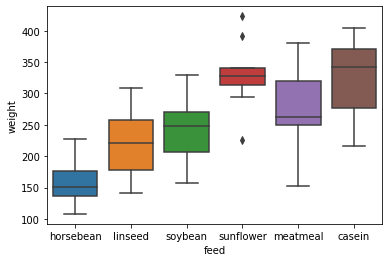

In [34]:
###### Hypothesis:--

## H0 : mu of cs = mu of hb = mu of ls = mu of mm = mu of sb = mu of sf
## H1 : mu of cs != mu of hb !=mu of ls != mu of mm != mu of sb != mu of sf
 
alpha=0.05

sns.boxplot(d.feed,d.weight)
plt.show()


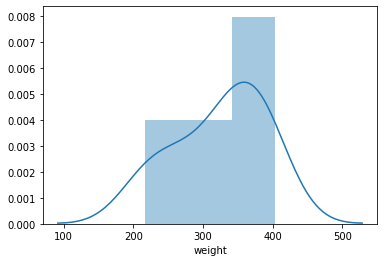

In [35]:
sns.distplot(d[d['feed']=='casein']['weight'])

In [36]:
d.groupby('feed').skew()

,weight
feed,
casein,-0.603021
horsebean,0.653784
linseed,0.012162
meatmeal,-0.329510
soybean,0.035112
sunflower,-0.071021


In [37]:
   #    # INFERENCES for the DATA:---

### 1. Least median value for Horsebean
### 2. Least skewed is Linseed
### 3. There are 3 outliers in Sunflower
### 4. Highest STD is for meatmeal
### 5. Highest average weight for sunflower
### 6. Highest median weight for casein
### 7. Least STD for horsebean
### 8. Highest weight for sunflower
### 9. Least weight for horse bean



d.groupby('feed')['weight'].describe()

,count,mean,std,min,25%,50%,75%,max
feed,,,,,,,,
casein,12.0,323.583333,64.433840,216.0,277.25,342.0,370.75,404.0
horsebean,10.0,160.200000,38.625841,108.0,137.00,151.5,176.25,227.0
linseed,12.0,218.750000,52.235698,141.0,178.00,221.0,257.75,309.0
meatmeal,11.0,276.909091,64.900623,153.0,249.50,263.0,320.00,380.0
soybean,14.0,246.428571,54.129068,158.0,206.75,248.0,270.00,329.0
sunflower,12.0,328.916667,48.836384,226.0,312.75,328.0,340.25,423.0


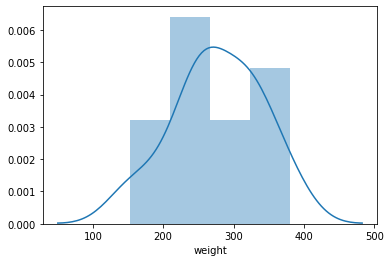

In [38]:
sns.distplot(d[d.feed=='meatmeal']['weight'])
plt.show()

###### Hypothesis:--  

##### H0 : mu of cs = mu of hb = mu of ls = mu of mm = mu of sb = mu of sf         
(mean of all the feed same[ feed is not impacting the weight ] )
##### H1 : mu of cs != mu of hb !=mu of ls != mu of mm != mu of sb != mu of sf 
(mean of all the feed are not same [ feed is impacting weight ] )

In [39]:
hb=d[d.feed=='horsebean']['weight']
cs=d[d.feed=='casein']['weight']
sf=d[d.feed=='sunflower']['weight']
sb=d[d.feed=='soybean']['weight']
ls=d[d.feed=='linseed']['weight']
mm=d[d.feed=='meatmeal']['weight']

In [40]:
st.f_oneway(hb,cs,sf,sb,ls,mm) 

### here p value is very lesser than alpha that means reject H0 i.e (mean of all the feed are not same [ feed is impacting weight ] )

F_onewayResult(statistic=15.364799774712537, pvalue=5.936419853471331e-10)

Since P value is less than alpha(0.05) reject null hypothesis .It means there is an impact of feed on weight

Post H0C analysis:-- if H0 or null hypothestis is rejected then we do poat of ANALYSIS:-    we do 'TUKEY HSD (Honest Significance Difference) ANALYSIS'

In [41]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [47]:
pairwise_tukeyhsd(d.weight,d.feed, alpha=0.05).summary()      # it will check on alpha given basis and give list of reject



# in p-adj column if p value < alpha reject H0 :----- True
# in p-adj column if p value > alpha Accept H0 :----- False

group1,group2,meandiff,p-adj,lower,upper,reject
casein,horsebean,-163.3833,0.001,-232.3445,-94.4222,True
casein,linseed,-104.8333,0.001,-170.5852,-39.0814,True
casein,meatmeal,-46.6742,0.3324,-113.9039,20.5554,False
casein,soybean,-77.1548,0.0084,-140.5149,-13.7947,True
casein,sunflower,5.3333,0.9,-60.4186,71.0852,False
horsebean,linseed,58.55,0.1412,-10.4112,127.5112,False
horsebean,meatmeal,116.7091,0.001,46.3375,187.0806,True
horsebean,soybean,86.2286,0.0042,19.544,152.9132,True
horsebean,sunflower,168.7167,0.001,99.7555,237.6778,True
linseed,meatmeal,58.1591,0.1274,-9.0705,125.3887,False


 Inference:--- sunflower and casein are iligible for weight increase as low mean diff betrween both and then see on cost effectiveness aand give as per costeffectiveness.

In [8]:
#### ASSUMPTIONS:---

# 1) Test of Normality   ( SHAPIRO)
# 2) Test of Variance    (Levene)
# 3) Test of Randomness  ( One Sample T-test)

In [9]:
### Que-02

m1=[15,14,20,15,16]
m2=[10,14,9,10,11]
m3=[17,12,14,15,12]

st.f_oneway(m1,m2,m3)
### here p value is less than alpha that means reject H0 

F_onewayResult(statistic=7.532846715328462, pvalue=0.007595782602661818)


####  ( B ) Two Way ANNOVA:--

HYPOTHESIS:--

   #### FOR SOIL:- soil impacting on yield or not
   
H0: mu of s1 = mu of s2 = mu of s3

H1: mu of s1 != mu of s2 != mu of s3

   #### FOR FERTILIZER  :- fertilizer impacting on yield or not
   
H0: mu of Sa = mu of Sb = mu of Sc

H1: mu of Sa != mu of Sb != mu of Sc

In [10]:
## there is no two way ANOVA fun in python.

### 4) Two sample related test [ paired ]  or Paired T Test:--

In [6]:
## H0: mean of d = 0
## H1: mean of d != 0

wt_before = [76, 76, 72, 73, 64, 63, 75, 75, 71, 76, 71, 76, 78, 73, 76, 70, 71, 82, 84, 68, 70, 68, 66, 67, 74]
wt_after  = [63, 72, 67, 69, 58, 59, 70, 71, 70, 71, 68, 71, 72, 69, 72, 67, 67, 78, 79, 62, 67, 63, 61, 63, 69]
alpha=0.05
n=25
degree_of_freedom =n-1
# tstat=(d_mean-mu)/(std/np.sqrt(n))                #method-1

st.ttest_rel(wt_after,wt_before)

### here p value is very lesser than alpha that means reject H0 

Ttest_relResult(statistic=-11.381954836452902, pvalue=3.704651177780503e-11)

In [11]:
dif= np.array(wt_after)-np.array(wt_before)  
dif                  # d value= after-before  

array([-13,  -4,  -5,  -4,  -6,  -4,  -5,  -4,  -1,  -5,  -3,  -5,  -6,
        -4,  -4,  -3,  -4,  -4,  -5,  -6,  -3,  -5,  -5,  -4,  -5])

In [18]:
## (diffrenece, population mean if not given take zero  ) 
st.ttest_1samp(dif,0)      #we can also one sample ttest after given d               #method-02  manual

### here p value is very lesser than alpha that means reject H0 

Ttest_1sampResult(statistic=-11.381954836452902, pvalue=3.704651177780503e-11)

In [7]:
st.t.isf(alpha,n)          ## t critical value

1.708140761251899

In [9]:
st.t.cdf(-11.38,degree_of_freedom)+st.t.sf(11.38,degree_of_freedom)            #p value

3.717649030123747e-11

## ( C )proportion Test:-  
### 1) single proportion test zproportion test
### 2) two proportion test

In [99]:
pd.crosstab(d.gender,d.pl)

pl,NO,YES
gender,,
FEMALE,98,62
MALE,84,86


In [100]:
d.pl.value_counts()


NO     182
YES    148
Name: pl, dtype: int64

### 1) single proportion test:--

In [101]:
##single proportion test

##H0: P=30%
## H1: P!=30%

p=0.3 
#           (total no,total value,percentage)
proportions_ztest(148,330,0.3)        #check for 30%f            #method 1
### here p value is lesser than alpha that means reject H0 

(5.423585591219213, 5.841522402204397e-08)

In [102]:
proportions_ztest(len(d[d.pl=='YES']),len(d.pl),0.3)    #method 2
### here p value is lesser than alpha that means reject H0 

(5.423585591219213, 5.841522402204397e-08)

In [103]:
proportions_ztest(148,330,0.4)         #check for 40%
### here p value is greater than alpha that means accept H0 

(1.7709667236634157, 0.07656623546471893)

In [104]:
148/330

0.4484848484848485

In [105]:
proportions_ztest(148,330,0.448)       #check for 44.8% which is exact
### here p value is higher than alpha that means accept H0  as percentage increases

(0.017709667236633874, 0.9858704685184021)

### 2) Two proportion test:--

In [106]:
### double proportion test:--


## H0: Pm=Pf
## H1: Pm!=Pf

cont_table=pd.crosstab(d.pl,d.gender)
cont_table

gender,FEMALE,MALE
pl,,
NO,98,84
YES,62,86


In [107]:
#([male yes,female yes],[totalmale,total female])
proportions_ztest([86,62],[170,160])       # 170 is total of male and 160 is total of female 
### here p value is lesser than alpha that means reject H0 

(2.1610351850000873, 0.03069262159535531)

# since it is not satisfy assumptions of parametric test hence we should apply non parametric test:-

### 1) MAnnwhitney Test
### 2) Test of Association(chi square test)
### 3) Goodness of Fit
### 4) Wilcoxon U Test
### 5) Kruskal wallis Test


## 1) Mannwhitney Test:-   ### more likly to two sample unrelated test of parametric

it's like a t-test in non parametric.

here this test will give the ranks towards male and female on basic of income as this is for categorical data

In [108]:
##non parametric test

## man and female income are unrelated 
mannwhitneyu(mi,fi)
### here p value is lesser than alpha that means reject H0 

MannwhitneyuResult(statistic=13394.0, pvalue=0.40623189504528334)

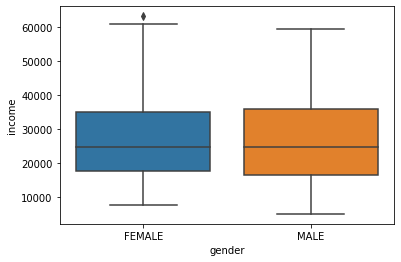

In [109]:
sns.boxplot(d.gender,d.income)
plt.show()

In [110]:
mi.mean(),fi.mean(),np.median(mi),np.median(fi),mi.std(),fi.std()        #don't effect on sample of population.no need to same all sample

(27082.06017647058,
 27435.078875000014,
 24574.9,
 24833.65,
 13026.85865640879,
 13144.527153631554)

## 2)Test of Association ( CHI-Square Test):--

In [111]:
cont_table=pd.crosstab(d.gender,d.pl)
cont_table


pl,NO,YES
gender,,
FEMALE,98,62
MALE,84,86


In [112]:
## H0: there is no association b/w gender and pl taken
## H1: there is an association b/w gender and pl taken

chi2_contingency(cont_table)
### here p value is lesser than alpha that means reject H0 

##( stastics , p-value , expected value as per observation)


(4.203725620315688, 0.040335270903050946, 1, array([[88.24242424, 71.75757576],
        [93.75757576, 76.24242424]]))

In [113]:
cont_table=pd.crosstab(d.married,d.pl)
cont_table

pl,NO,YES
married,,
NO,53,63
YES,129,85


In [114]:
## H0: there is no association b/w gender and pl taken
## H1: there is an association b/w gender and pl taken

chi2_contingency(cont_table)
### here p value is lesser than alpha that means reject H0 

##( stastics , p-value , expected value as per observation)

(5.898041621988204,
 0.015157729377672154,
 1,
 array([[ 63.97575758,  52.02424242],
        [118.02424242,  95.97575758]]))

In [115]:
cont_table=pd.crosstab(d.region,d.pl)
cont_table

pl,NO,YES
region,,
INNER_CITY,85,70
RURAL,26,28
SUBURBAN,14,11
TOWN,57,39


In [116]:
## H0: there is no association b/w gender and pl taken
## H1: there is an association b/w gender and pl taken

chi2_contingency(cont_table)
### here p value is higher than alpha that means accept H0  so no association

##( stastics , p-value , expected value as per observation)

(1.776514811293037, 0.6200588623676881, 3, array([[85.48484848, 69.51515152],
        [29.78181818, 24.21818182],
        [13.78787879, 11.21212121],
        [52.94545455, 43.05454545]]))

In [117]:
cont_table=pd.crosstab(d.children,d.pl)
cont_table

pl,NO,YES
children,,
0,90,51
1,12,57
2,50,32
3,30,8


In [118]:
## H0: there is no association b/w gender and pl taken
## H1: there is an association b/w gender and pl taken

chi2_contingency(cont_table)
### here p value is lesser than alpha that means reject H0  so assocition

##( stastics , p-value , expected value as per observation)

(53.89216994212963,
 1.1830750145503304e-11,
 3,
 array([[77.76363636, 63.23636364],
        [38.05454545, 30.94545455],
        [45.22424242, 36.77575758],
        [20.95757576, 17.04242424]]))

In [119]:
cont_table=pd.crosstab(d.car,d.pl)
cont_table

pl,NO,YES
car,,
NO,95,79
YES,87,69


In [120]:
## H0: there is no association b/w gender and pl taken
## H1: there is an association b/w gender and pl taken

chi2_contingency(cont_table)
### here p value is higher than alpha that means accept H0  so no assocition

##( stastics , p-value , expected value as per observation)

(0.010565495064832148,
 0.9181307579498735,
 1,
 array([[95.96363636, 78.03636364],
        [86.03636364, 69.96363636]]))

In [121]:
cont_table=pd.crosstab(d.mortgage,d.pl)
cont_table

pl,NO,YES
mortgage,,
NO,121,102
YES,61,46


In [122]:
## H0: there is no association b/w gender and pl taken
## H1: there is an association b/w gender and pl taken

chi2_contingency(cont_table)
### here p value is higher than alpha that means accept H0  so no assocition

##( stastics , p-value , expected value as per observation)

(0.12378134004427904,
 0.7249689654993441,
 1,
 array([[122.98787879, 100.01212121],
        [ 59.01212121,  47.98787879]]))

In [123]:
cont_table=pd.crosstab(d.save_act,d.pl)
cont_table

pl,NO,YES
save_act,,
NO,56,47
YES,126,101


In [124]:
## H0: there is no association b/w gender and pl taken
## H1: there is an association b/w gender and pl taken

chi2_contingency(cont_table)
### here p value is higher than alpha that means accept H0  so no assocition

##( stastics , p-value , expected value as per observation)

(0.005345157445153201,
 0.9417181196452988,
 1,
 array([[ 56.80606061,  46.19393939],
        [125.19393939, 101.80606061]]))

In [125]:
cont_table=pd.crosstab(d.save_act,d.pl)
cont_table

pl,NO,YES
save_act,,
NO,56,47
YES,126,101


In [126]:
## H0: there is no association b/w gender and pl taken
## H1: there is an association b/w gender and pl taken

chi2_contingency(cont_table)
### here p value is higher than alpha that means accept H0  so no assocition

##( stastics , p-value , expected value as per observation)

(0.005345157445153201,
 0.9417181196452988,
 1,
 array([[ 56.80606061,  46.19393939],
        [125.19393939, 101.80606061]]))

In [127]:
cont_table=pd.crosstab(d.current_act,d.pl)
cont_table

pl,NO,YES
current_act,,
NO,43,28
YES,139,120


In [128]:
## H0: there is no association b/w gender and pl taken
## H1: there is an association b/w gender and pl taken

chi2_contingency(cont_table)
### here p value is lesser than alpha that means rejectr H0  so  assocition

##( stastics , p-value , expected value as per observation)

(0.8105386870545395,
 0.36796103562830784,
 1,
 array([[ 39.15757576,  31.84242424],
        [142.84242424, 116.15757576]]))

In [129]:
### t -test

## H0: r=0   # r is correlation coefficient
## H1: r!=0

d.corr()

,age,income,children
age,1.000000,0.745769,-0.005431
income,0.745769,1.000000,0.057417
children,-0.005431,0.057417,1.000000


In [130]:
## H0: r=0   # r is correlation coefficient
## H1: r!=0

## correlation test
from scipy.stats import pearsonr


pearsonr(d.age,d.income)
### here p value is lesser than alpha that means reject H0  so  assocition

(0.7457687646809331, 8.191938869097008e-60)

### 4) Wilcoxon U Test:--  For paired T-Test in non-Parametric  test

In [31]:
wt_before = [76, 76, 72, 73, 64, 63, 75, 75, 71, 76, 71, 76, 78, 73, 76, 70, 71, 82, 84, 68, 70, 68, 66, 67, 74]
wt_after  = [63, 72, 67, 69, 58, 59, 70, 71, 70, 71, 68, 71, 72, 69, 72, 67, 67, 78, 79, 62, 67, 63, 61, 63, 69]
alpha=0.05

shapiro(wt_after),shapiro(wt_before)   #normal distriobution so don't do non parametric only do parametric

((0.9580029249191284, 0.37613582611083984),
 (0.9754794239997864, 0.7835781574249268))

In [38]:
## H0: mean of d = 0
## H1: mean of d != 0

mb=[62,64,40,65,76,82,53,1,0,0]          # always no. of observation need to same before or after in sample
ma=[52,56,61,47,58,52,56,2,3,4]

shapiro(mb),shapiro(ma) #check normality first

#since this distribution is not following normal so use go for wilcoxon U test

((0.8395571112632751, 0.04358839988708496),
 (0.7210698127746582, 0.0015869945054873824))

In [43]:
wilcoxon(mb,ma)      
### here p value is greater than alpha that means accept H0   (marks before = marks after)

WilcoxonResult(statistic=19.0, pvalue=0.38565298663545133)

In [46]:
mb=[62,64,40,65,76,82,53,1,0,0]          
ma=[52,56,61,47,58,52,56,2,3,4]
dif=np.array(mb)-np.array(ma)                   #method-2
dif

array([ 10,   8, -21,  18,  18,  30,  -3,  -1,  -3,  -4])

In [51]:
wilcoxon(dif)

WilcoxonResult(statistic=19.0, pvalue=0.38565298663545133)

### KRUSKAL WALIS :- NON Parametric test:-

In [ ]:
stats.kruskal(X1,X2,X3)

   #                                        REGRESSION ANALYSIS:-

### Advertising Dataset

In [22]:
d=pd.read_csv('Advertising.csv')
d.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [16]:
d.shape

(200, 5)

In [23]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [29]:
## Simple Linear Regression:

model1= ols('Sales ~ Newspaper',data=d).fit()         # sales is a fun of Newspaper

In [30]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Thu, 17 Oct 2019   Prob (F-statistic):            0.00115
Time:                        17:07:51   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3514      0.621     19.876      0.000      11.126      13.577
Newspaper      0.0547      0.017      3.300      0.001       0.022       0.087
==============================================================================
Omnibus:                        6.231   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                5.483
Skew:                           0.330   Prob(JB):                       0.0645
Kurtosis:                       2.527   Cond. No.                         64.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
model2= ols('Sales ~ Newspaper+Radio+TV',data=d).fit()   
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 17 Oct 2019   Prob (F-statistic):           1.58e-96
Time:                        17:08:08   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
TV             0.0458      0.001     32.809      0.000       0.043       0.049
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
print(pairwise_tukeyhsd(d["Sales"], 
                        d["Newspaper"],alpha=0.05)) 